In [1]:
import pandas as pd
import numpy as np

In [2]:
main_df= pd.read_csv("./DSL_Winter_Project_2025/development.csv")
df=main_df
pd.set_option('display.max_columns', None)
df

,Id,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,0,22050,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,1,22050,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,2,22050,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,3,22050,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,4,22050,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2928,22050,24.0,male,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav
2929,2929,22050,15.0,female,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav
2930,2930,22050,17.0,female,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav
2931,2931,22050,18.0,male,arabic,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav


## Data preparation 

In [3]:
# ID ; Sampling_rate
df= df.drop(columns=['Id','sampling_rate'])
df

,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,male,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav
2929,15.0,female,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav
2930,17.0,female,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav
2931,18.0,male,arabic,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav


In [ ]:
import librosa

# extract essential features from the audio file
def extract_audio_features(file_path):
    path = f"DSL_Winter_Project_2025/{file_path}"
    y, sr = librosa.load(path, sr=None)
    
    n_fft = 512
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft)
    mfccs_mean = np.mean(mfccs)
    mfccs_std = np.std(mfccs)
    
    #chroma 
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft)
    chroma_mean = np.mean(chroma)
    chroma_std = np.std(chroma)
    
    #  spectral cont
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft)
    spectral_contrast_mean = np.mean(spectral_contrast)
    spectral_contrast_std = np.std(spectral_contrast)
    
    # RMS
    rms = librosa.feature.rms(y=y, frame_length=n_fft)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)
    
    features = np.array([mfccs_mean, mfccs_std, chroma_mean, chroma_std, spectral_contrast_mean, spectral_contrast_std, rms_mean, rms_std])
    return features

audio_features = df['path'].apply(extract_audio_features)

feature_columns = ['mfcc_mean', 'mfcc_std', 'chroma_mean', 'chroma_std', 'spectral_contrast_mean', 'spectral_contrast_std', 'rms_mean', 'rms_std']
audio_features_df = pd.DataFrame(audio_features.tolist(), index=df.index, columns=feature_columns)
df = pd.concat([df, audio_features_df], axis=1)



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std
0,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,-44.547501,157.628799,0.601347,0.270957,15.892583,15.862821,0.029260,0.037429
1,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,-32.332245,146.182632,0.744908,0.210172,14.359265,14.458605,0.063211,0.061826
2,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,-31.127766,139.614136,0.732113,0.230387,14.538529,15.804387,0.040729,0.036374
3,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,-33.001522,134.256439,0.639580,0.268652,17.260935,16.278019,0.112179,0.099161
4,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,-32.405846,145.783966,0.699115,0.256604,15.354621,15.651587,0.054701,0.048795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,male,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav,-35.793713,152.287399,0.699871,0.258172,14.615844,15.156315,0.032664,0.028482
2929,15.0,female,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav,-40.712307,151.455338,0.742457,0.209983,10.121317,8.008594,0.015350,0.010209
2930,17.0,female,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav,-38.413429,159.708160,0.757230,0.200937,11.300468,8.375154,0.027729,0.026252
2931,18.0,male,arabic,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav,-37.068031,156.069046,0.679335,0.249796,16.174195,15.173311,0.046266,0.048058


In [ ]:
# --Gender--

from sklearn.preprocessing import LabelEncoder
# female will be encod as 0 and male to 1
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df.drop('gender', axis=1, inplace=True)


,age,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std,gender_encoded
0,24.0,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,-44.547501,157.628799,0.601347,0.270957,15.892583,15.862821,0.029260,0.037429,0
1,22.5,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,-32.332245,146.182632,0.744908,0.210172,14.359265,14.458605,0.063211,0.061826,0
2,22.0,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,-31.127766,139.614136,0.732113,0.230387,14.538529,15.804387,0.040729,0.036374,0
3,22.0,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,-33.001522,134.256439,0.639580,0.268652,17.260935,16.278019,0.112179,0.099161,0
4,22.0,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,-32.405846,145.783966,0.699115,0.256604,15.354621,15.651587,0.054701,0.048795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav,-35.793713,152.287399,0.699871,0.258172,14.615844,15.156315,0.032664,0.028482,1
2929,15.0,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav,-40.712307,151.455338,0.742457,0.209983,10.121317,8.008594,0.015350,0.010209,0
2930,17.0,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav,-38.413429,159.708160,0.757230,0.200937,11.300468,8.375154,0.027729,0.026252,0
2931,18.0,arabic,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav,-37.068031,156.069046,0.679335,0.249796,16.174195,15.173311,0.046266,0.048058,1


In [6]:
# --Ethnicity--

ethnicity_counts = df['ethnicity'].value_counts()
num_ethnicities = df['ethnicity'].nunique()
print("Number of different nationalities:", num_ethnicities)
print(ethnicity_counts)

Number of different nationalities: 165
ethnicity
igbo        1081
english      579
arabic       102
mandarin      65
french        63
            ... 
hakka          1
malagasy       1
lingala        1
fang           1
rundi          1
Name: count, Length: 165, dtype: int64


In [ ]:
ethnicity_counts = df['ethnicity'].value_counts()
df['ethnicity_encoded'] = df['ethnicity'].map(ethnicity_counts)
df = df.drop(columns=['ethnicity'])


,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std,gender_encoded,ethnicity_encoded
0,24.0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,-44.547501,157.628799,0.601347,0.270957,15.892583,15.862821,0.029260,0.037429,0,102
1,22.5,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,-32.332245,146.182632,0.744908,0.210172,14.359265,14.458605,0.063211,0.061826,0,9
2,22.0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,-31.127766,139.614136,0.732113,0.230387,14.538529,15.804387,0.040729,0.036374,0,48
3,22.0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,-33.001522,134.256439,0.639580,0.268652,17.260935,16.278019,0.112179,0.099161,0,579
4,22.0,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,-32.405846,145.783966,0.699115,0.256604,15.354621,15.651587,0.054701,0.048795,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav,-35.793713,152.287399,0.699871,0.258172,14.615844,15.156315,0.032664,0.028482,1,579
2929,15.0,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav,-40.712307,151.455338,0.742457,0.209983,10.121317,8.008594,0.015350,0.010209,0,1081
2930,17.0,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav,-38.413429,159.708160,0.757230,0.200937,11.300468,8.375154,0.027729,0.026252,0,1081
2931,18.0,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav,-37.068031,156.069046,0.679335,0.249796,16.174195,15.173311,0.046266,0.048058,1,102


mean_pitch    0
max_pitch     0
min_pitch     0
dtype: int64


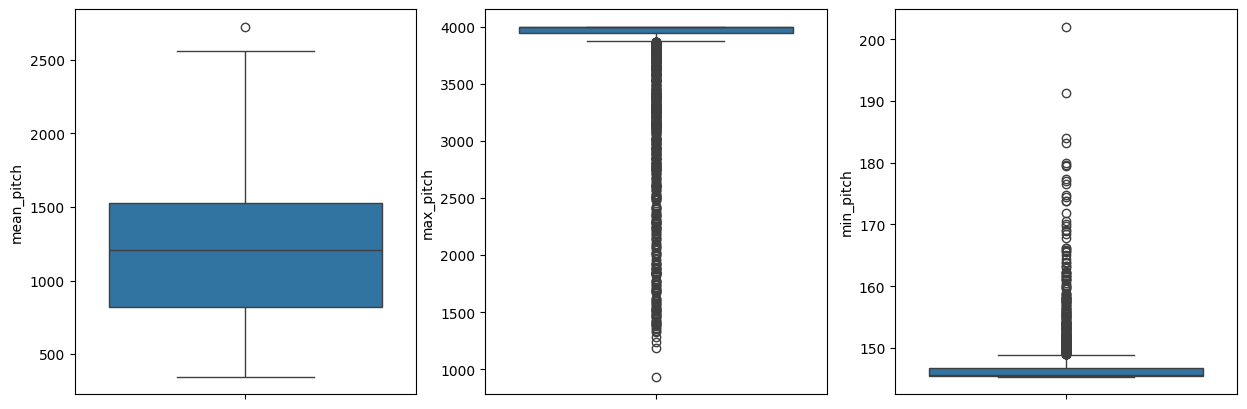

,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std,gender_encoded,ethnicity_encoded
0,24.0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,-44.547501,157.628799,0.601347,0.270957,15.892583,15.862821,0.029260,0.037429,0,102
1,22.5,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,-32.332245,146.182632,0.744908,0.210172,14.359265,14.458605,0.063211,0.061826,0,9
2,22.0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,-31.127766,139.614136,0.732113,0.230387,14.538529,15.804387,0.040729,0.036374,0,48
3,22.0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,-33.001522,134.256439,0.639580,0.268652,17.260935,16.278019,0.112179,0.099161,0,579
4,22.0,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,-32.405846,145.783966,0.699115,0.256604,15.354621,15.651587,0.054701,0.048795,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav,-35.793713,152.287399,0.699871,0.258172,14.615844,15.156315,0.032664,0.028482,1,579
2929,15.0,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav,-40.712307,151.455338,0.742457,0.209983,10.121317,8.008594,0.015350,0.010209,0,1081
2930,17.0,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav,-38.413429,159.708160,0.757230,0.200937,11.300468,8.375154,0.027729,0.026252,0,1081
2931,18.0,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav,-37.068031,156.069046,0.679335,0.249796,16.174195,15.173311,0.046266,0.048058,1,102


In [ ]:
#  --mean_pitch ; max_pitch ; min_pitch--

print(df[['mean_pitch', 'max_pitch', 'min_pitch']].isnull().sum())

# see outliers with boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['mean_pitch'])
plt.subplot(1, 3, 2)
sns.boxplot(y=df['max_pitch'])
plt.subplot(1, 3, 3)
sns.boxplot(y=df['min_pitch'])
plt.show()



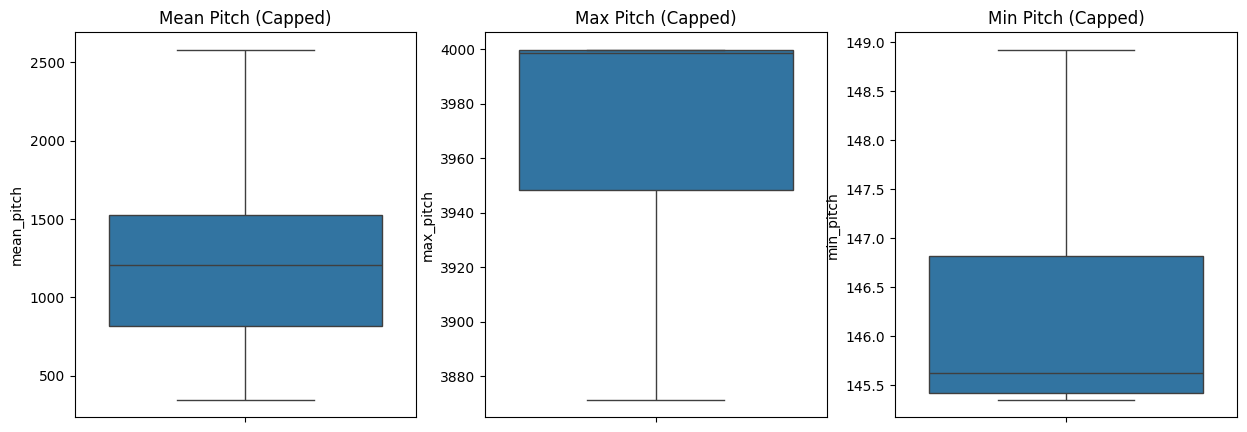

In [9]:
# Detecting and capping outliers using IQR
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

cap_outliers('mean_pitch')
cap_outliers('max_pitch')
cap_outliers('min_pitch')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['mean_pitch'])
plt.title('Mean Pitch (Capped)')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['max_pitch'])
plt.title('Max Pitch (Capped)')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['min_pitch'])
plt.title('Min Pitch (Capped)')
plt.show()

In [11]:
# --Jitter--
missing_jitter = df['jitter'].isnull().sum()
print("Missing values in jitter:", missing_jitter)

Missing values in jitter: 0


In [12]:
cap_outliers('jitter')

In [13]:
# --Shimmer--
missing_values = df['shimmer'].isnull().sum()
print("Missing values in shimmer:", missing_values)


Missing values in shimmer: 0


In [ ]:
cap_outliers('shimmer')

In [15]:
# --Energy--
missing_energy = df['energy'].isnull().sum()
print("Missing values in energy:", missing_energy)

Missing values in energy: 0


In [16]:
cap_outliers('energy')

In [17]:
#  --zcr_mean--
missing_zcr_mean = df['zcr_mean'].isnull().sum()
print("Missing values in zcr_mean:", missing_zcr_mean)

Missing values in zcr_mean: 0


In [18]:
cap_outliers('zcr_mean')

In [19]:
# --Spectral_centroid_mean--
spectral_centroid_mean = df['spectral_centroid_mean'].isnull().sum()
print("Missing values in spectral_centroid_mean:", spectral_centroid_mean)

Missing values in spectral_centroid_mean: 0


In [20]:
cap_outliers('spectral_centroid_mean')

In [21]:
# --Tempo--

df.loc[:, 'tempo'] = df['tempo'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
print(df['tempo'].head())

0    151.999081
1    129.199219
2    117.453835
3    117.453835
4    112.347147
Name: tempo, dtype: object


In [22]:
miss_tempo = df['tempo'].isnull().sum()
print("Missing values in tempo:", miss_tempo)

Missing values in tempo: 0


In [23]:
cap_outliers('tempo')

In [25]:
# --hnr--
missing_values_hnr = df['hnr'].isnull().sum()
print("Missing values in hnr:", missing_values_hnr)

Missing values in hnr: 0


In [26]:
cap_outliers('hnr')

In [27]:
# --silence--
cap_outliers('silence_duration')

In [28]:
print(df['silence_duration'].head())

0    23.846893
1    19.388662
2    21.640998
3    19.644127
4    18.041905
Name: silence_duration, dtype: float64


In [ ]:
# --Path--

df = df.drop(columns=['path'])


,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std,gender_encoded,ethnicity_encoded
0,24.0,1821.69060,3999.7170,145.430660,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,281,39,23.846893,-44.547501,157.628799,0.601347,0.270957,15.892583,15.862821,0.029260,0.037429,0,102
1,22.5,1297.81870,3998.8590,145.372680,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,281,21,19.388662,-32.332245,146.182632,0.744908,0.210172,14.359265,14.458605,0.063211,0.061826,0,9
2,22.0,1332.85240,3998.8025,145.423950,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,281,1,21.640998,-31.127766,139.614136,0.732113,0.230387,14.538529,15.804387,0.040729,0.036374,0,48
3,22.0,1430.34990,3998.4510,147.980830,0.017004,0.102389,0.012904,0.173701,3269.751413,117.453835,-56.459762,69,281,9,19.644127,-33.001522,134.256439,0.639580,0.268652,17.260935,16.278019,0.112179,0.099161,0,579
4,22.0,1688.72340,3998.6113,145.447720,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,281,11,18.041905,-32.405846,145.783966,0.699115,0.256604,15.354621,15.651587,0.054701,0.048795,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,24.0,1641.14930,3999.1616,145.393590,0.023647,0.115361,0.001879,0.111799,2188.853478,184.570312,-100.921055,69,281,11,17.461406,-35.793713,152.287399,0.699871,0.258172,14.615844,15.156315,0.032664,0.028482,1,579
2929,15.0,1089.60050,3984.6550,145.584090,0.015317,0.126740,0.000339,0.070508,2712.362323,83.354335,6.757283,0,0,1,1.509206,-40.712307,151.455338,0.742457,0.209983,10.121317,8.008594,0.015350,0.010209,0,1081
2930,17.0,994.46484,3989.1785,148.923515,0.009677,0.103535,0.001464,0.058442,2248.698477,89.102909,-53.913449,1,9,1,1.645034,-38.413429,159.708160,0.757230,0.200937,11.300468,8.375154,0.027729,0.026252,0,1081
2931,18.0,1600.00820,3999.7559,145.361010,0.019571,0.100946,0.004451,0.115139,1834.596924,143.554688,-96.143090,69,281,19,16.346848,-37.068031,156.069046,0.679335,0.249796,16.174195,15.173311,0.046266,0.048058,1,102


In [30]:
from sklearn.preprocessing import StandardScaler

#  acoustic features to standardize
acoustic_features = [
    'mean_pitch', 'max_pitch', 'min_pitch', 'jitter', 'shimmer', 'energy', 
    'zcr_mean', 'spectral_centroid_mean', 'tempo', 'hnr', 'silence_duration'
]

scaler = StandardScaler()
df[acoustic_features] = scaler.fit_transform(df[acoustic_features])
df[acoustic_features].head()

,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,silence_duration
0,1.527246,0.640812,-0.697762,-1.228674,-0.884064,-0.674812,2.053493,1.621997,0.890289,-1.287020,0.967926
1,0.261701,0.624337,-0.744187,0.741045,-0.399821,0.911910,-0.503326,-0.845048,0.158566,-0.322635,0.551883
2,0.346334,0.623252,-0.703135,-0.329752,0.431795,-0.469380,0.013240,0.694663,-0.218382,-0.622378,0.762071
3,0.581864,0.616502,1.344188,-0.681577,-0.179615,2.361926,1.344521,1.894805,-0.218382,0.469989,0.575723
4,1.206030,0.619580,-0.684102,1.197742,0.624359,0.213328,0.050532,-0.424334,-0.382272,-0.151479,0.426203


## Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


data = df

X = data.drop(columns=['age'])  
y = data['age']

categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(columns=categorical_features).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# --linear regression--
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - Root Mean Squared Error: {rmse_lr}')
print(f'Linear Regression - R² Score: {r2_lr}')

Linear Regression - Root Mean Squared Error: 10.124680845647902
Linear Regression - R² Score: 0.3811290891787136


In [33]:
# --Random forest--
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'RandomForest - Root Mean Squared Error: {rmse}')
print(f'Random Forest - R² Score: {r2}')
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
RandomForest - Root Mean Squared Error: 9.639382714216412
Random Forest - R² Score: 0.439034913255666
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


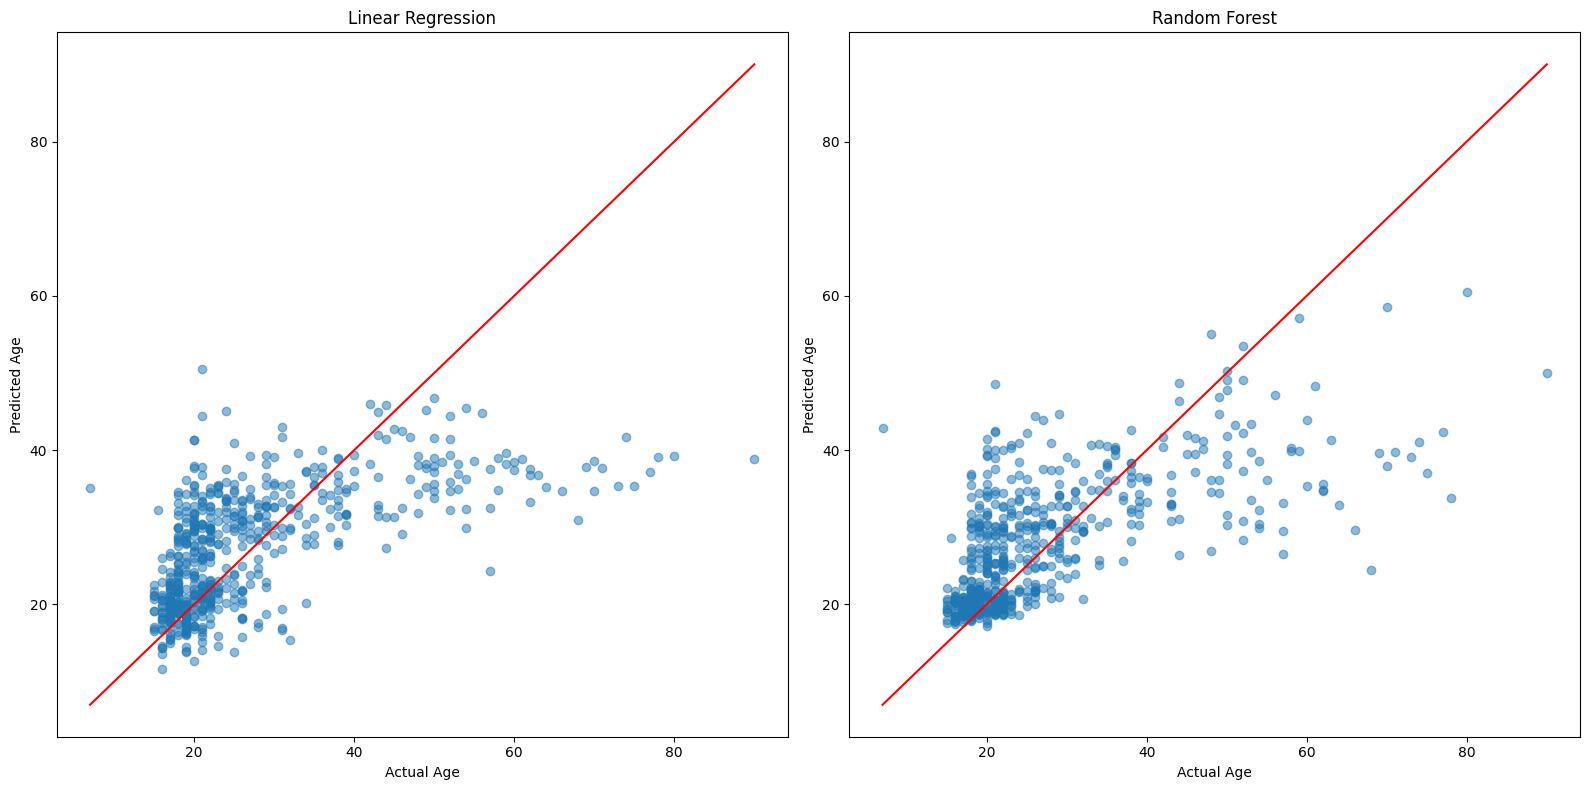

In [ ]:

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Random Forest')

# save
plt.savefig('./report/figures/combined_predictions.png')

plt.tight_layout()
plt.show()

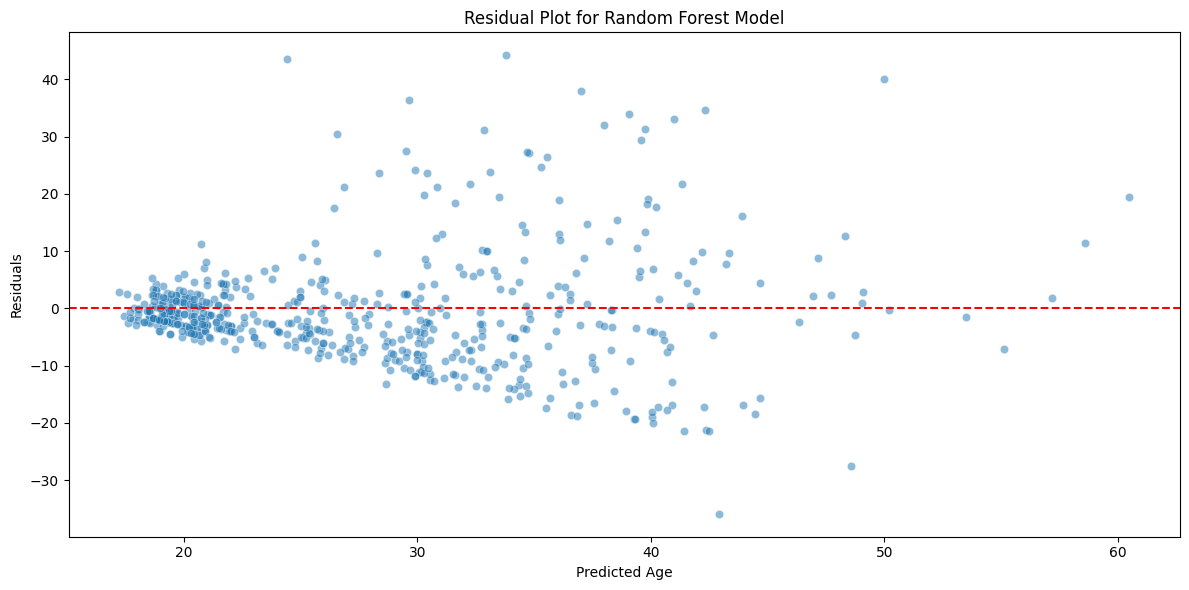

In [35]:

residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Model')
plt.tight_layout()
plt.savefig('./report/figures/residual_plot.png')
plt.show()

last



## Evaluation data set

In [ ]:
evaluation_data = pd.read_csv('./DSL_Winter_Project_2025/evaluation.csv')
ids = evaluation_data['Id']


# extract audio feature
audio_features_eval = evaluation_data['path'].apply(extract_audio_features)

feature_columns = ['mfcc_mean', 'mfcc_std', 'chroma_mean', 'chroma_std', 'spectral_contrast_mean', 'spectral_contrast_std', 'rms_mean', 'rms_std']
audio_features_eval_df = pd.DataFrame(audio_features_eval.tolist(), index=evaluation_data.index, columns=feature_columns)
evaluation_data = pd.concat([evaluation_data, audio_features_eval_df], axis=1)



# drop the Id, sampling rate, path
evaluation_data = evaluation_data.drop(columns=['Id','sampling_rate','path'])
# --gender--
evaluation_data['gender_encoded'] = evaluation_data['gender'].apply(lambda x: 0 if x.lower().startswith('f') else 1 if x.lower().startswith('m') else np.nan)
evaluation_data.drop('gender', axis=1, inplace=True)



evaluation_data


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,mfcc_mean,mfcc_std,chroma_mean,chroma_std,spectral_contrast_mean,spectral_contrast_std,rms_mean,rms_std,gender_encoded
0,spanish,1056.91740,3945.1610,145.38750,0.022082,0.171076,0.003136,0.032963,1549.607050,[80.74951172],-116.662338,69,281,2,38.198503,-30.654924,150.991104,0.802347,0.191487,14.292422,14.519955,0.044093,0.034509,1
1,xiang,1231.84570,3999.1720,145.56432,0.026571,0.132585,0.006783,0.123895,2344.817369,[89.10290948],-78.253824,69,281,27,29.605442,-31.775873,142.691116,0.732510,0.243304,15.024329,15.368975,0.061424,0.054907,1
2,igbo,958.29065,3445.4490,145.67374,0.018044,0.096289,0.004478,0.089149,1939.574896,[123.046875],-71.630742,6,22,2,2.275556,-33.241402,139.986313,0.729991,0.226920,11.691452,10.186931,0.049818,0.044677,1
3,spanish,1396.54170,3998.8948,145.41223,0.027290,0.088901,0.014893,0.097054,1832.059113,[123.046875],-101.533013,69,281,31,22.151837,-29.741240,139.912231,0.732623,0.230855,14.440435,14.584782,0.081007,0.091257,0
4,spanish,1633.86770,3999.7632,145.36313,0.021621,0.103855,0.001369,0.140950,2534.611168,[112.34714674],-134.914070,69,281,35,22.430476,-38.553989,160.208633,0.683817,0.253464,15.335424,15.908229,0.023723,0.028514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,igbo,570.62740,3900.6730,145.67577,0.018842,0.079197,0.004545,0.072083,1946.502158,[112.34714674],-42.895295,6,15,1,1.861950,-32.530075,146.578827,0.748875,0.209678,11.453570,8.361791,0.055378,0.039222,1
687,igbo,974.13965,3919.0024,145.90408,0.024367,0.117492,0.000878,0.076900,3319.620800,[112.34714674],-144.881089,7,22,1,4.876190,-36.604256,158.909134,0.747795,0.209360,11.083668,8.191234,0.017196,0.024173,1
688,serbian,1113.27650,3999.3510,145.38307,0.020637,0.089355,0.009148,0.095613,1973.127197,[112.34714674],-73.559944,69,281,15,25.541950,-31.409912,144.744766,0.741204,0.221401,14.868591,14.867732,0.070640,0.064565,0
689,spanish,1759.17420,3999.4610,145.56773,0.026118,0.106429,0.003707,0.141474,2137.517812,[117.45383523],-93.562873,69,281,10,20.967619,-32.999596,143.336441,0.674613,0.259972,13.519936,13.384246,0.043325,0.042761,1


In [37]:
ethnicity_counts = evaluation_data['ethnicity'].value_counts()
num_ethnicities = evaluation_data['ethnicity'].nunique()
print("Number of different nationalities:", num_ethnicities)
print(ethnicity_counts)

Number of different nationalities: 73
ethnicity
igbo          232
spanish       162
turkish        37
vietnamese     22
swedish        20
             ... 
lokaa           1
hausa           1
wu              1
ogoni           1
sundanese       1
Name: count, Length: 73, dtype: int64


In [38]:
ethnicity_counts_eval = evaluation_data['ethnicity'].value_counts()
evaluation_data['ethnicity_encoded'] = evaluation_data['ethnicity'].map(ethnicity_counts_eval)

evaluation_data = evaluation_data.drop(columns=['ethnicity'])


for feature in ['mean_pitch', 'max_pitch', 'min_pitch', 'jitter', 'shimmer', 'energy', 'zcr_mean', 'spectral_centroid_mean', 'tempo', 'hnr', 'silence_duration']:
    cap_outliers(feature)

evaluation_data['tempo'] = evaluation_data['tempo'].apply(lambda x: float(x.strip('[]')))

scaler = StandardScaler()
numerical_features = ['mean_pitch', 'max_pitch', 'min_pitch', 'jitter', 'shimmer', 'energy', 'zcr_mean', 'spectral_centroid_mean', 'tempo', 'hnr', 'silence_duration']
evaluation_data[numerical_features] = scaler.fit_transform(evaluation_data[numerical_features])

evaluation_data = evaluation_data.apply(pd.to_numeric, errors='coerce')

evaluation_data = evaluation_data.fillna(0)

evaluation_data = evaluation_data.reindex(columns=X.columns, fill_value=0)




In [39]:
y_pred_eval = best_rf_model.predict(evaluation_data)

submission = pd.DataFrame({
    'Id': ids,
    'Predicted': y_pred_eval
})

submission.to_csv('last.csv', index=False)